We need to check the four different conditions for the marginal allocation alorithm: 

    1) Objective functions are separable
    2) Objective functions are integer-convex
    3) One objective functions is increasing 
    4) The other one is decreasing
We want to minimize f  = c's + qEBO(s)
- c't is the increasing objective function
- qEBO(s) is the decreasing objective function


---
step 0

    Ri(si) = 1 - Po(s, EBO(0i)) 
    EBOi(si+1) = EBO(si) - Ri(si) 
    deltaf_divG(si) = Ri(si)/c(i)
---
step 1

    Pick the largest value from deltaf_divG

---
Step 2

    Cost Part
    1) remove max value from deltaf_divG and set idx in deltaf_divG to zero and keep idx
    2) Add cost of part idx mod 9
    3) Save to matrix X
    4) jump to step 1

    Shortage part
    1) Count the shortage for the parts which were broken from Cost Part
    2) Sum up shortage for each new broken part (each row in X)










0
10
35
50
64
109
128
208
241
271
296
376
421
431


Text(0, 0.5, 'EBO')

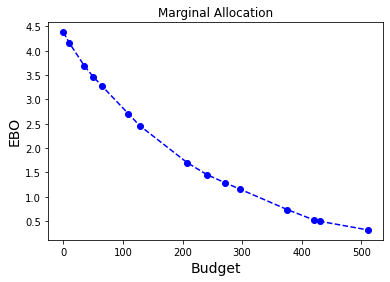

In [ ]:
# Problem 1 

# Imports
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# initialize vars

lam = np.array([50, 40, 45, 51, 25, 48, 60, 35, 15])/1000
c = np.array([14, 19, 25, 15, 10, 45, 80, 33, 30])
T = np.array([4, 7, 14, 5, 10, 18, 24, 8, 12])
X = np.zeros(len(c))
Xt = np.zeros(len(c)) # Dummy
budget = 500
cost = 0
val = int(budget/c.min()) # We need to make the matrix in the size of the budget/cheapest part

EBO = np.zeros(((val+1),len(X)))
Ri = np.zeros((val,len(X)))
delt = np.zeros((val,len(X)))

# Step 0
for i in range(len(c)):
  EBO[0,i] = T[i]*lam[i] # the first row is just T*lambda
  for s in range(val):
    Ri[s,i] = 1-poisson.cdf((s), EBO[0,i]) # Palm --> poission distr 
    EBO[s+1,i] = EBO[s,i] - Ri[s,i] # EBO - R
    delt[s,i] = (EBO[s,i]-EBO[s+1,i]) /c[i] # Shortage / cost
# Step 1 & 2

FlattenList = delt.flatten() # Flatten the matrix
count = 0

#Cost
while cost < budget:
  print(cost)
  idx = np.argmax(FlattenList)   # idx of max value in flatten list
  value = FlattenList[idx] # save max value
  FlattenList[idx] = 0     # set value to zero so we can't pick it agian
  cost += c[idx % len(c)]
  X = np.vstack((X, Xt)) # We have X = [[0,0],[0,1]], Xt = [0,0] stack will make this: X = [[0,0],[0,1],[0,0]]
  X[count+1] = X[count]
  X[count+1][idx % len(c)] = X[count+1][idx % len(c)] + 1   # adding the 1 to the index of the part which is broken
  count += 1
Xplot = np.dot(X,c) # Broken parts times costs is the values we have optimized

#Shortage
ExpectedBackOrders = np.zeros(len(X))
for i in range(len(X)):
  for j in  range(len(c)):
    idx = int(X[i,j]) 
    ExpectedBackOrders[i] += EBO[idx,j] # Summing up EBO from the Costs above

# Plot
plt.plot(Xplot, ExpectedBackOrders, linestyle='--', marker='o', color='b')
plt.title('Marginal Allocation')
plt.xlabel('Budget', fontsize=14)
plt.ylabel('EBO', fontsize=14)


Dynamic programming

In [ ]:
def rowCutter(row, fromm, to, LRUarray, Sol):
  a = [0]
  cut = np.split(LRUarray, [fromm, to])
  cut = a.extend(cut[0].tolist())
  j = 0
  for i in range((len(c)-len(cut)),len(cut)):
    Sol[row,i] = cut(j)
    j += 1


  print(cut)
  return Sol


def mini(SolN, idx):
  for bud in range(budget+1):
    SolN1 = np.zeros((int(LRU[bud,idx]+1),int(len(c)+1)))
    for part in range(int(LRU[bud,idx]+1)):
      LRUarray = SolN[int(bud-part*c[idx]), :]
      print(LRUarray)
      rowCutter(part, idx, len(c), LRUarray, SolN1)
      b = np.split(A,[idx,len(c)])
      print(idx)
      print(b)
      SolN1[part,idx:len(c)] = [part, LRUarray[0,idx:len(c)]]
      SolN1[part,idx:len(c)] = [part, LRUarray[0,idx:len(c)]]
      SolN1[part, (len(c)+1)] = EBO[part,idx] + LRUarray[(len(c)+1)]
    
  return SolN


LRU = np.trunc(np.tile(np.arange(0,budget+1),len(c)).reshape(len(c),budget+1).T/c) 
Sol = np.zeros(((budget+1), (len(c)+1)))
Sol[:,len(c)] = LRU[:,len(c)-1]

for i in range(budget+1):
  Sol[i,(len(c))] = EBO[int(Sol[i,len(c)])][len(c)-1]

for backwards in range(len(c)-2,-1,-1): # backwards
  Sol = mini(Sol, backwards)
"""
for j = 1:n-1
    t17 = solutions;
        for i=1:c_budget+1
            parts = LRU(i,n-j);
            sol_matrix = zeros(parts+1,n+1); 
            
            for q=0:parts
                subLRU = t17(i-q*c(n-j),:);
                sol_matrix(q+1,n-j:n) = [q, subLRU(1,n-j+1:n)]; 
                sol_matrix(q+1,n+1)= EBO(q+1,n-j) + subLRU(n+1);
            end
            [~, I] = min(sol_matrix(:,n+1)); 
            solutions(i,:) = sol_matrix(I,:);
        end  
"""

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.18]


TypeError: ignored